## Question 3

Part c: Write a function that implements the particle filter propagation step (Algorithm 3) for a
differential-drive ground robot.

In [114]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.linalg import expm
import math



In [115]:
def particleFilterPropogate(xInit, wheelSpeeds, nextTime, radius, width, variance1, variance2):
    
    xNext = []

    for x in xInit:
        x = np.array(x)
        velocityLeft = wheelSpeeds[0] + np.random.normal(0,variance1)
        velocityRight = wheelSpeeds[1] + np.random.normal(0,variance2)

        omega = [[0, -(radius/width)*(velocityRight - velocityLeft), (radius/2)*(velocityRight + velocityLeft)],
                 [(radius/width)*(velocityRight - velocityLeft), 0, 0],
                 [0,0,0]
                ]
        omega = np.array(omega)
        u = nextTime * omega
        u = np.array(u)
        u = expm(u)
        u = np.array(u)
        xNext.append(np.matmul(x,u))
    
    return xNext

Part d: Write a function that implements the particle filter update step (Algorithm 4).

In [116]:
def particleFilterUpdate(xPrior, z, varianceP):

    weight = []
    z = np.array([[z[0]],[z[1]]])
    noOfIndex = np.array(xPrior).shape[0]
    indexList = []
    xPosterior = []

    for x in xPrior:
        lt = np.array([[x[0][2]],[x[1][2]]])
        I = [[1,0],
             [0,1]]
        I = np.array(I)

        coV = (varianceP**2) * I
        error = np.subtract(z,lt)

        product = np.matmul(np.transpose(error),coV)
        product = - np.matmul(product,error) / 2
        expOfProduct = math.exp(product)
        
        det = 2*math.pi*coV
        det = np.linalg.det(det)
        det = math.sqrt(det)

        weight.append(expOfProduct/det)
        
    indexList = np.random.choice(noOfIndex,len(xPrior), weight)
    for i in indexList:
        xPosterior.append(xPrior[i])

    return xPosterior

def updateStep(poses, measurement, varience):
    weight = []
    zt = np.array(measurement)
    update = []

    for x in poses:
        lt = np.array([x[0][2],x[1][2]])
        covarience = np.dot(varience**2, [[1,0],[0,1]])
        ep = zt-lt
        square = ep.T.dot(covarience)
        square = square.dot(ep)
        exp = math.exp(-square/2)
        div = varience * (2*math.pi)**2
        result = exp/div
        weight.append(result)

    list_of_indices = np.random.choice(len(poses), len(poses), weight)

    for index in list_of_indices:
        update.append(poses[index])
    
    return update
        

Part e: Using the particle filter propagation function that you implemented in part (c), generate
N = 1000 realizations of x10 (the pose of the robot at time t = 10) from p(x10|x0, φ˙ l, φ˙ r, r,w, σl, σr),
assuming that x0 = (0, I2) ∈ SE(2) (i.e. that the robot starts at the origin at time t = 0).
Calculate the empirical mean and covariance of the positions of the points in this particle
set, and plot the positions of the sampled particles in the plane.

In [117]:
x0 = [[1,0,0],
      [0,1,0],
      [0,0,1],
      ]

xInit = []

for i in range(1000):
      xInit.append(x0)


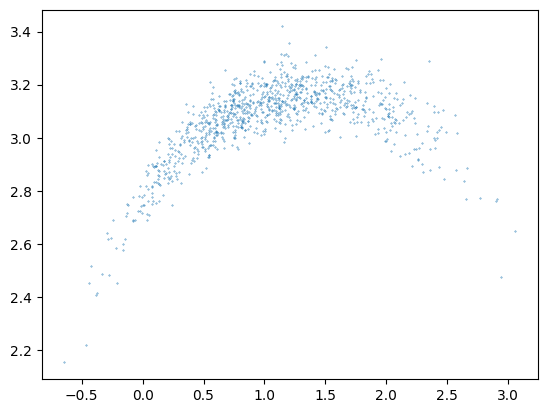

In [118]:
currentTime = 0
wheelSpeeds = [1.5, 2]
nextTime = 10
radius = 0.25
width = 0.5
variance1 = 0.05
variance2 = 0.05

xPrior = particleFilterPropogate(xInit, wheelSpeeds, nextTime, radius, width, variance1, variance2)

y1 = []
y2 = []
for x in xPrior:
    y1.append(x[0][2])
    y2.append(x[1][2])

plt.scatter(y1,y2,s=0.1)
plt.show()

Part f: Starting with an initial particle set X0 consisting of N = 1000 copies of I = (0, I2) ∈
SE(2) (indicating absolute certainty that the robot’s initial pose x0 is the origin), apply
your particle filter propagation function from part (c) to recursively generate sample-based
approximations to the robot’s belief over its pose xt ∈ SE(2) at times t ∈ {5, 10, 15, 20}.
For each of these sample sets, report the empirical mean and covariance of the particles’
positions. Finally, plot the positions of the particles in each of these sample sets in a single
plot, using a different color for each sample set.

var1 =  [0.02077397 0.01599354] 
var2 =  [0.25934262 0.01437138] 
var3 =  [0.28492763 0.35100034] 
var4 =  [0.24815811 0.62615361]


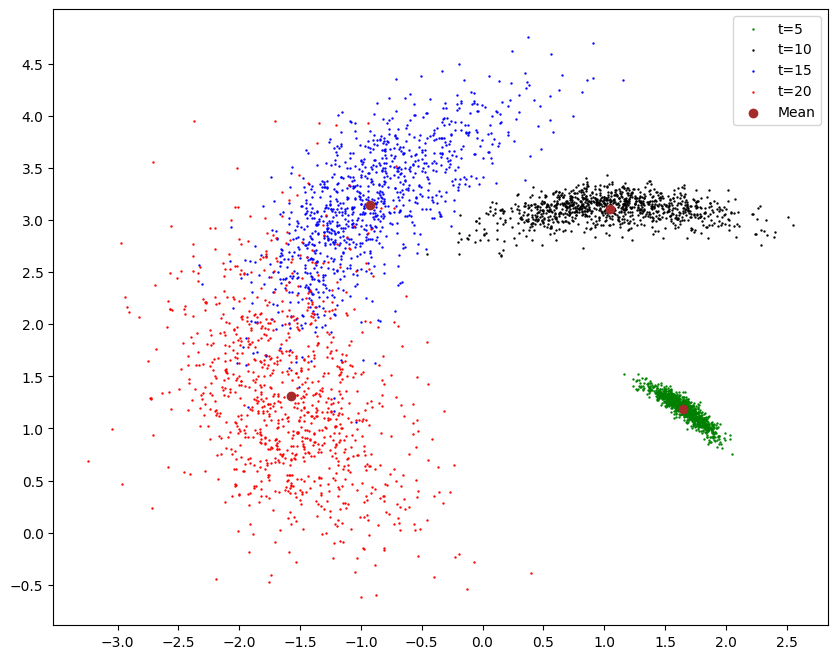

In [119]:
xPrior1 = particleFilterPropogate(xInit, wheelSpeeds, 5, radius, width, variance1, variance2)
xPrior2 = particleFilterPropogate(xPrior1, wheelSpeeds, 5, radius, width, variance1, variance2)
xPrior3 = particleFilterPropogate(xPrior2, wheelSpeeds, 5, radius, width, variance1, variance2)
xPrior4 = particleFilterPropogate(xPrior3, wheelSpeeds, 5, radius, width, variance1, variance2)

a1 = []
b1 = []
c1 = []
d1 = []
for x in xPrior1:
    a1.append([x[0][2],x[1][2]])
for x in xPrior2:
    b1.append([x[0][2],x[1][2]])
for x in xPrior3:
    c1.append([x[0][2],x[1][2]])
for x in xPrior4:
    d1.append([x[0][2],x[1][2]])


a1 = np.array(a1)
b1 = np.array(b1)
c1 = np.array(c1)
d1 = np.array(d1)

x1Mean = np.mean(a1,axis=0)
x2Mean = np.mean(b1,axis=0)
x3Mean = np.mean(c1,axis=0)
x4Mean = np.mean(d1,axis=0)

x1Var = np.var(a1,axis=0)
x2Var = np.var(b1,axis=0)
x3Var = np.var(c1,axis=0)
x4Var = np.var(d1,axis=0)

print("var1 = ", x1Var,"\nvar2 = ",x2Var,"\nvar3 = ",x3Var,"\nvar4 = ",x4Var)

plt.figure(figsize = (10,8))
plt.xticks(np.arange(-3,3,0.5))
plt.yticks(np.arange(-3,5,0.5))


plt.scatter(a1[:,0],a1[:,1],s=0.5,c='green')
plt.scatter(b1[:,0],b1[:,1],s=0.5,c='black')
plt.scatter(c1[:,0],c1[:,1],s=0.5,c='blue')
plt.scatter(d1[:,0],d1[:,1],s=0.5,c='red')

plt.scatter(x1Mean[0],x1Mean[1],c="brown")
plt.scatter(x2Mean[0],x2Mean[1],c="brown")
plt.scatter(x3Mean[0],x3Mean[1],c="brown")
plt.scatter(x4Mean[0],x4Mean[1],c="brown")

plt.legend(['t=5','t=10','t=15','t=20',"Mean"])

plt.show()


Part g: Staring with an initial particle set X0 containing N = 1000 copies of I = (0, I2) ∈ SE(2)
(indicating absolute certainty that the robot’s initial pose x0 is the origin), apply your particle
filter propagation and update functions from parts (c) and (d) to recursively generate
sample-based approximations of the robot’s posterior beliefs over its pose xt ∈ SE(2) at
times t ∈ {5, 10, 15, 20} obtained after incorporating the sequence of measurements:

In [121]:
z5 = [1.6561,1.2847]
z10 = [1.0505,3.1059]
z15 = [-0.9875,3.2118]
z20 = [-1.6450,1.1978]
varianceP = 0.10

x1_after = particleFilterUpdate(xPrior1, z5, varianceP)

xPrior2 = particleFilterPropogate(x1_after, wheelSpeeds, 5, radius, width, variance1, variance2)
x2_after = particleFilterUpdate(xPrior2, z10, varianceP)
# x2_after = updateStep(xPrior2, z10, varianceP)

xPrior3 = particleFilterPropogate(x2_after, wheelSpeeds, 5, radius, width, variance1, variance2)
# x3_after = particleFilterUpdate(xPrior3, z15, varianceP)
x3_after = updateStep(xPrior3, z15, varianceP)

xPrior4 = particleFilterPropogate(x3_after, wheelSpeeds, 5, radius, width, variance1, variance2)
# x4_after = particleFilterUpdate(xPrior4, z20, varianceP)
x4_after = updateStep(xPrior4, z20, varianceP)

a1 = []
b1 = []
c1 = []
d1 = []

for x in xPrior1:
    a1.append([x[0][2],x[1][2]])
for x in xPrior2:
    b1.append([x[0][2],x[1][2]])
for x in xPrior3:
    c1.append([x[0][2],x[1][2]])
for x in xPrior4:
    d1.append([x[0][2],x[1][2]])


a1 = np.array(a1)
b1 = np.array(b1)
c1 = np.array(c1)
d1 = np.array(d1)

x1Mean = np.mean(a1,axis=0)
x2Mean = np.mean(b1,axis=0)
x3Mean = np.mean(c1,axis=0)
x4Mean = np.mean(d1,axis=0)

x1Var = np.var(a1,axis=0)
x2Var = np.var(b1,axis=0)
x3Var = np.var(c1,axis=0)
x4Var = np.var(d1,axis=0)

print("var1 = ", x1Var,"\nvar2 = ",x2Var,"\nvar3 = ",x3Var,"\nvar4 = ",x4Var)

plt.figure(figsize = (8,8))
plt.xticks(np.arange(-3,3,0.5))
plt.yticks(np.arange(-3,5,0.5))

plt.scatter(a1[:,0],a1[:,1],s=0.5,c='green')
plt.scatter(b1[:,0],b1[:,1],s=0.5,c='black')
plt.scatter(c1[:,0],c1[:,1],s=0.5,c='blue')
plt.scatter(d1[:,0],d1[:,1],s=0.5,c='red')

plt.scatter(x1Mean[0],x1Mean[1],c="brown")
plt.scatter(x2Mean[0],x2Mean[1],c="brown")
plt.scatter(x3Mean[0],x3Mean[1],c="brown")
plt.scatter(x4Mean[0],x4Mean[1],c="brown")

plt.legend(['t=5','t=10','t=15','t=20',"Mean"])

plt.show()



## Question 2

Part a: Implement a function EstimateCorrespondences(X, Y , t, R, dmax)

In [ ]:
def estimateCorrespondence(xSet,ySet,t,rotMat,dMax):
    C = []

    for x in xSet:

        xToy = np.matmul(rotMat,x)

        for y in ySet:
            if dMax > math.sqrt((xToy[0] - y[0])**2 + (xToy[1] - y[1])**2 + (xToy[2] - y[2])**2 ):
                C.append((x,y))
                break
            else:
                continue
    return C

PArt b: Implement the function ComputeOptimalRigidRegistration(X, Y , C) shown in Algorithm
2.

In [ ]:
#def computeOptimalRigidRegistratrion(xSet,ySet,C):

    